In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import re
import warnings
warnings.filterwarnings('ignore')
from  sklearn.ensemble import RandomForestRegressor as RF
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model,feature_selection,metrics
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.tree import export_graphviz
from subprocess import check_call

C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv(r'akrai\home_info_comp_comp_desk.29924.csv')

In [4]:
df.columns = df.iloc[0].values

In [5]:
df = df.iloc[1:]

In [6]:
df.head()

,RAM Expandability upto (GB),Type of RAM,RAM Speed (MHz),RAM Size (GB),Expansion Slots (PCIe x 1) (Number),Expansion Slots (PCIe x 16) (Number),Expansion Slots (PCIe x 4) (Number),Chipset,Minimum Power Efficiency(%),Power Supply (Watt),...,Internal Bays,External Bays (Number),DIMM Slots (Number),Cabinet,final_price,VariantID,Title,Brand,Model,Seller Name
1,32,DDR 4,2400,8,0,1,1,Intel H270,85,180,...,1,1,2,Small Form Factor,51000,5116877-10016397415,HP 400 G4 SFF i5 Win10Pro 813 Wifi,hp,HP 400 G4 SFF i5 Win10Pro 813 Wifi,FINECONS PRIVATE LIMITED
2,32,DDR 4,2400,8,0,1,1,Intel H270,85,180,...,1,1,2,Small Form Factor,49450,5116877-10016397415,HP 400 G4 SFF i5 Win10Pro 813 Wifi,hp,HP 400 G4 SFF i5 Win10Pro 813 Wifi,HP India Sales Pvt Ltd
3,16,DDR 4,2133,4,1,0,0,Intel H110,85,220,...,1,0,2,Tower,40000,5116877-10030360148,ACER DESKTOP,acer,ACER VERITON M200 H110,RASHMI ENTERPRISES
4,16,DDR 4,2133,4,1,0,0,Intel H110,85,220,...,1,0,2,Tower,48000,5116877-10030360148,ACER DESKTOP,acer,ACER VERITON M200 H110,Angel Info Tech
5,32,DDR 4,2400,4,1,1,1,Intel H110,85,200,...,1,1,2,Tower,30900,5116877-10037855419,Acer veriton i3 7th-4gb-1tb-18.5-dos 3 year,acer,Acer veriton i3 7th-4gb-1tb-18.5-dos 3 year,YAKSHINI MICRO SYSTEMS


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504 entries, 1 to 11504
Data columns (total 47 columns):
RAM Expandability upto (GB)              11496 non-null object
Type of RAM                              11504 non-null object
RAM Speed (MHz)                          11504 non-null object
RAM Size (GB)                            11504 non-null object
Expansion Slots (PCIe x 1) (Number)      11504 non-null object
Expansion Slots (PCIe x 16) (Number)     11504 non-null object
Expansion Slots (PCIe x 4) (Number)      11504 non-null object
Chipset                                  11501 non-null object
Minimum Power Efficiency(%)              11504 non-null object
Power Supply (Watt)                      11485 non-null object
Monitor Resolution (PIXELS)              11504 non-null object
Monitor Certification                    11504 non-null object
Monitor Size (INCHES)                    11504 non-null object
Display Port                             11504 non-null object
VGA      

In [8]:
df['final_price'] = df['final_price'].astype('float')

In [9]:
# Removing data with price less than 7000
df = df[df['final_price']>7000]

In [10]:
#for final merge with prediction
final=df

### 1. RAM related Columns

#### 1.1 RAM Expandability upto (GB)

In [11]:
df['RAM Expandability upto (GB)'].isnull().sum()

8

In [12]:
df['RAM Expandability upto (GB)'].value_counts()

32    6459
16    2671
64    2360
Name: RAM Expandability upto (GB), dtype: int64

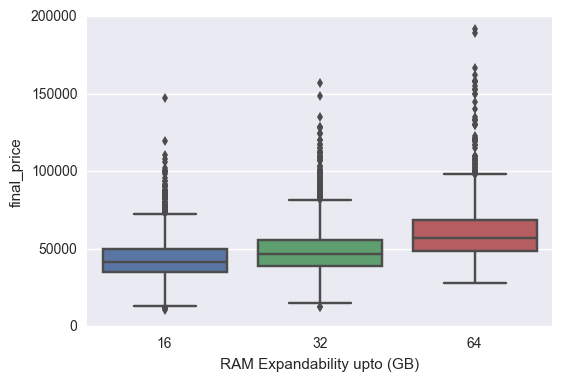

In [13]:
# After removing outliers
sns.boxplot(x= df['RAM Expandability upto (GB)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

In [14]:
# Fill nulls with avg
df['RAM Expandability upto (GB)'] = df['RAM Expandability upto (GB)'].fillna(df['RAM Expandability upto (GB)'].astype(float).mean()).astype(float)

#### 1.2 Type of RAM

In [15]:
df['Type of RAM'].value_counts()

DDR 4    11498
Name: Type of RAM, dtype: int64

In [16]:
# Since it has 1 value only. Remove
df = df.drop('Type of RAM',axis=1)

#### 1.3 RAM Speed (MHz)

In [17]:
df['RAM Speed (MHz)'].isnull().sum()

0

In [18]:
# changing data type
df['RAM Speed (MHz)'] = df['RAM Speed (MHz)'].astype('float')

In [19]:
df['RAM Speed (MHz)'].value_counts()

2400.000    9133
2133.000    2235
2667.000     130
Name: RAM Speed (MHz), dtype: int64

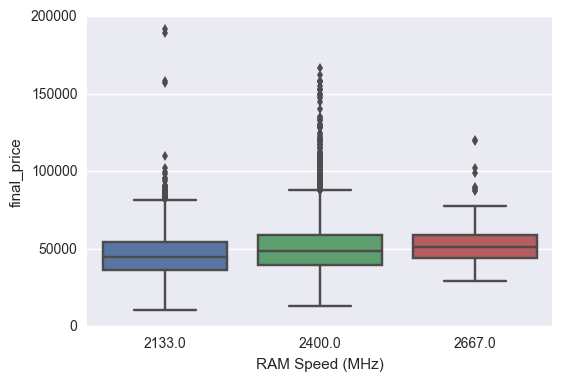

In [20]:
# After removing outliers
sns.boxplot(x= df['RAM Speed (MHz)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

#### 1.4 RAM Size (GB)

In [21]:
df['RAM Size (GB)'].isnull().sum()

0

In [22]:
df['RAM Size (GB)'] = df['RAM Size (GB)'].astype(int)
df['RAM Size (GB)'].value_counts()

4     7713
8     3462
16     269
32      54
Name: RAM Size (GB), dtype: int64

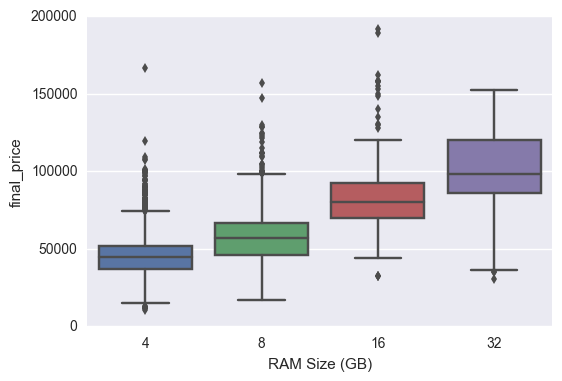

In [23]:
# After removing outliers
sns.boxplot(x= df['RAM Size (GB)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

### 2. Processor Related Columns

#### 2.1 Processor Make

In [24]:
df['Processor Make'].value_counts()

Intel    11394
AMD        104
Name: Processor Make, dtype: int64

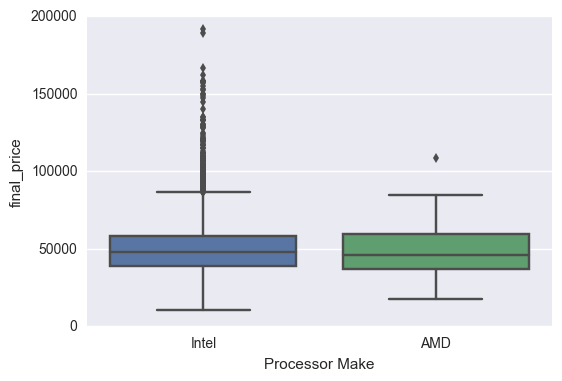

In [25]:
# After removing outliers
sns.boxplot(x= df['Processor Make'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

Does not look much important

#### 2.2 Processor Generation

In [26]:
df['Processor Generation'].value_counts()

7th    9614
6th    1832
8th      52
Name: Processor Generation, dtype: int64

In [27]:
# Changing values to number
df['Processor Generation'] = df['Processor Generation'].apply(lambda x: x[0]).astype(int)

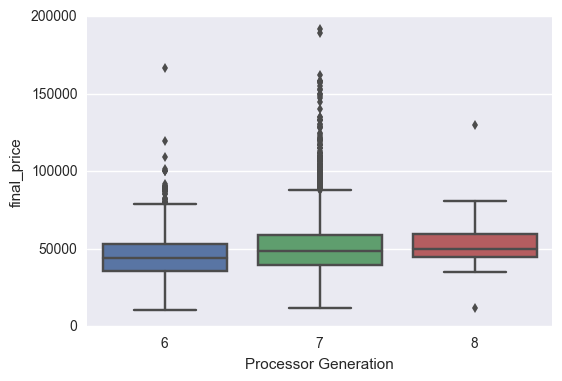

In [28]:
# After removing outliers
sns.boxplot(x= df['Processor Generation'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

#### 2.3 Processor

In [29]:
df['Processor'].value_counts()

Intel  Core i3-7100 (3.9 GHz, 3 MB Cache, 2 Cores)            2833
Intel  Core i7-7700 (3.6 GHz, 8 MB Cache, 4 Cores)            1946
Intel  Core i5-7500 (3.4 GHz, 6 MB Cache, 4 Cores)            1598
Intel  Core i5-7400 (3.0 GHz, 6 MB Cache, 4 Cores)            1221
Intel  Core i3-6100 (3.7 GHz, 3 MB Cache, 2 Cores)             781
Intel Pentium G4560 ( 3.5 GHz, 3 MB Cache, 2 Cores)            723
Intel  Core i5-6500 (3.2 GHz, 6 MB Cache, 4 Cores)             335
Intel  Core i5-6400 (2.7 GHz, 6 MB Cache, 4 Cores)             293
Intel  Core i3-7100T (3.4 GHz, 3 MB Cache, 2 Cores)            237
Intel  Core i7-6700 (3.4 GHz, 8 MB Cache, 4 Cores)             233
Intel  Core i5-7500T (2.7 GHz, 6 MB Cache, 4 Cores)            174
Intel  Core i7-7700T (2.9 GHz, 8 MB Cache, 4 Cores)            127
Intel  Core i5-7600 (3.5 GHz, 6 MB Cache, 4 Cores)             124
Intel  Core i5-7400T (2.4 GHz, 6 MB Cache, 4 Cores)            114
Intel  Core i7-7700K (4.2 GHz, 8 MB Cache, 4 Cores)           

In [30]:
df_processor= df[['Processor']]
df_processor['P_Br'] = df_processor['Processor'].apply(lambda x: re.findall(r'(.*)\(',x)[0].split(' ')[0])

In [31]:
# Extract Core Type and Core Version
df_processor['Processor_Core_Type']=''
df_processor['Processor_Core_Version']=''

#For Intel
df_processor['Processor_Core_Type'][df_processor['P_Br']=='Intel']=df_processor['Processor'].apply(lambda l:' '.join('-'.join(l.replace('  ',' ').split(' ')[1:3]).split('-')[:-1]))
df_processor['Processor_Core_Version'][df_processor['P_Br']=='Intel']=df_processor['Processor'].apply(lambda l:' '.join('-'.join(l.replace('  ',' ').split(' ')[1:3]).split('-')[-1:]))

#For AMD
df_processor['Processor_Core_Type'][df_processor['P_Br']=='AMD']=df_processor['Processor'].apply(lambda l:' '.join('-'.join(l.replace('  ',' ').split(' ')[1:4]).split('-')[:1]))
df_processor['Processor_Core_Version'][df_processor['P_Br']=='AMD']=df_processor['Processor'].apply(lambda l:' '.join('-'.join(l.replace('  ',' ').split(' ')[1:3]).split('-')[-2:-1]))

In [32]:
df_processor['Processor_Speed']=df_processor['Processor'].apply(lambda l: re.findall('.*(\(.*\))',l)[0].replace(')','').replace('(','').split(',')[0])
df_processor['Processor_Cache']=df_processor['Processor'].apply(lambda l: re.findall('.*(\(.*\))',l)[0].replace(')','').replace('(','').split(',')[1])
df_processor['Processor_Cores']=df_processor['Processor'].apply(lambda l: re.findall('.*(\(.*\))',l)[0].replace(')','').replace('(','').split(',')[2])

In [33]:
df=pd.concat([df,df_processor.drop('Processor',1)],axis=1)

In [34]:
df_processor

,Processor,P_Br,Processor_Core_Type,Processor_Core_Version,Processor_Speed,Processor_Cache,Processor_Cores
1,"Intel Core i5-7500 (3.4 GHz, 6 MB Cache, 4 Co...",Intel,Core i5,7500,3.4 GHz,6 MB Cache,4 Cores
2,"Intel Core i5-7500 (3.4 GHz, 6 MB Cache, 4 Co...",Intel,Core i5,7500,3.4 GHz,6 MB Cache,4 Cores
3,"Intel Core i3-6100 (3.7 GHz, 3 MB Cache, 2 Co...",Intel,Core i3,6100,3.7 GHz,3 MB Cache,2 Cores
4,"Intel Core i3-6100 (3.7 GHz, 3 MB Cache, 2 Co...",Intel,Core i3,6100,3.7 GHz,3 MB Cache,2 Cores
5,"Intel Core i3-7100T (3.4 GHz, 3 MB Cache, 2 C...",Intel,Core i3,7100T,3.4 GHz,3 MB Cache,2 Cores
6,"Intel Core i7-7700 (3.6 GHz, 8 MB Cache, 4 Co...",Intel,Core i7,7700,3.6 GHz,8 MB Cache,4 Cores
7,"Intel Core i5-7400 (3.0 GHz, 6 MB Cache, 4 Co...",Intel,Core i5,7400,3.0 GHz,6 MB Cache,4 Cores
8,"Intel Core i3-7350 (4.2 GHz, 4 MB Cache, 2 Co...",Intel,Core i3,7350,4.2 GHz,4 MB Cache,2 Cores
9,"Intel Core i3-7350 (4.2 GHz, 4 MB Cache, 2 Co...",Intel,Core i3,7350,4.2 GHz,4 MB Cache,2 Cores
10,"Intel Core i7-7700 (3.6 GHz, 8 MB Cache, 4 Co...",Intel,Core i7,7700,3.6 GHz,8 MB Cache,4 Cores


#### 2.3.1 Processor_Core_Type

In [35]:
df['Processor_Core_Type'].isnull().sum()

0

In [36]:
df['Processor_Core_Type'].value_counts()

Core i3    4108
Core i5    3972
Core i7    2399
Pentium     867
Celeron      47
A10          25
A4           23
Ryzen        23
A6           16
A8           14
A12           3
PRO           1
Name: Processor_Core_Type, dtype: int64

In [37]:
pro_type_map = {'Celeron':1,'Pentium':2,'Core i3':3,'Core i5':4,'Core i7':5,'PRO':0,'A4':1,'A6':2,'A8':3,'A10':4,'A12':4.5,'Ryzen':5}
df['Processor_Core_Type_Num'] = df['Processor_Core_Type'].map(pro_type_map)
df['Processor_Core_Type_Num']= df['Processor_Core_Type_Num'].fillna(0)

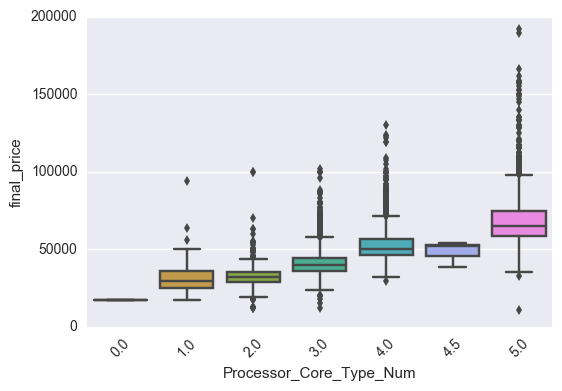

In [38]:
# After removing outliers
sns.boxplot(x= df['Processor_Core_Type_Num'][(df.final_price<200000)],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

#### 2.3.2 Process_Speed

In [39]:
df['Processor_Speed'].isnull().sum()

0

In [40]:
df['Processor_Speed'] = df['Processor_Speed'].apply(lambda x: re.sub("GHz", "", str(x)).strip()).astype(float)

In [41]:
df['Processor_Speed'].value_counts()

3.900    2936
3.400    2093
3.600    1968
3.000    1250
3.500     991
3.700     784
2.700     468
3.200     346
2.900     154
2.400     118
4.200     111
3.800     104
3.300      69
2.800      34
4.000      24
3.100      16
2.000      15
1.500      15
4.100       2
Name: Processor_Speed, dtype: int64

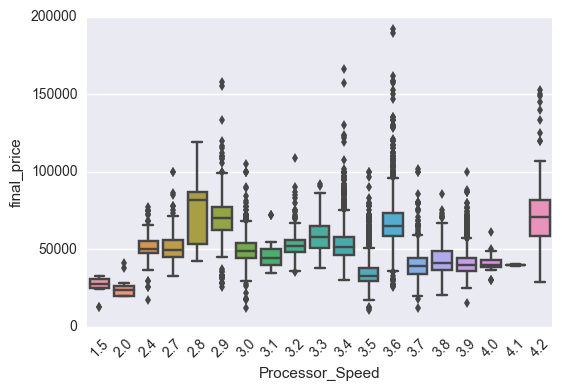

In [42]:
# After removing outliers
sns.boxplot(x= df['Processor_Speed'][(df.final_price<200000)],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

#### 2.3.3 Process_Cache

In [43]:
df['Processor_Cache'].isnull().sum()

0

In [44]:
df['Processor_Cache'] = df.Processor_Cache.apply(lambda x: re.sub("\D", " ", str(x)).strip()).astype(int)

In [45]:
df['Processor_Cache'].value_counts()

3     4765
6     3978
8     2412
4      241
2       50
1       39
16       6
12       4
9        3
Name: Processor_Cache, dtype: int64

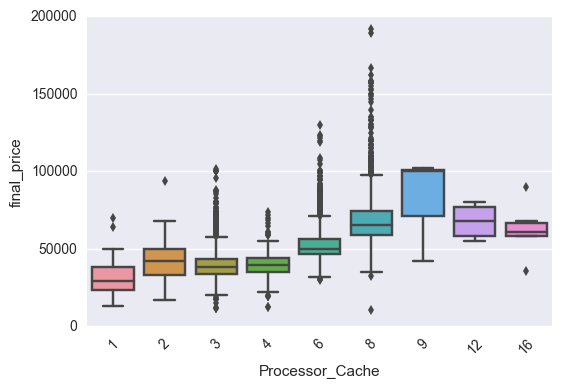

In [46]:
# After removing outliers
sns.boxplot(x= df['Processor_Cache'][(df.final_price<200000)],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

#### 2.2.4 Processor Cores

In [47]:
df['Processor_Cores'].isnull().sum()

0

In [48]:
df['Processor_Cores'].value_counts()

 4 Cores     6417
 2 Cores     5037
 4 Core        23
 4 Cores       13
 6 Cores        7
 6 Core         1
Name: Processor_Cores, dtype: int64

In [49]:
df['Processor_Cores'] = df.Processor_Cores.apply(lambda x: re.sub("\D", " ", str(x)).strip()).astype(int)

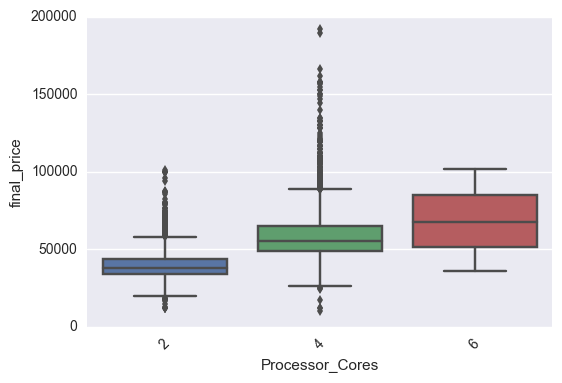

In [50]:
# After removing outliers
sns.boxplot(x= df['Processor_Cores'][(df.final_price<200000)],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

### 3. Monitor

#### 3.1 Monitor Resolution (PIXELS) 

In [51]:
df['Monitor Resolution (PIXELS)'].value_counts()

1366x768       5009
1920x1080      3701
1440 x 900     1534
1600 x 900     1092
3200x1800       100
3840 x 2160      62
Name: Monitor Resolution (PIXELS), dtype: int64

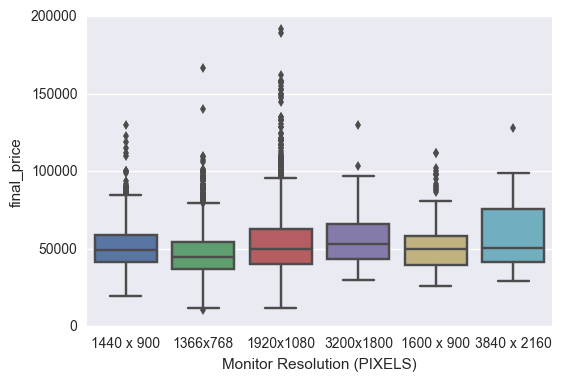

In [52]:
# After removing outliers
sns.boxplot(x= df['Monitor Resolution (PIXELS)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

In [53]:
# Converting to number of pixels
df['Monitor Resolution (PIXELS)'] = df['Monitor Resolution (PIXELS)'].apply(lambda x: int(re.findall('(.*)x',x)[0].strip()) * int(re.findall('x(.*)',x)[0].strip()))

#### 3.2 Monitor Certification

In [54]:
df['Monitor Certification'].value_counts()

TCO 6.0    9783
TCO 7.0    1715
Name: Monitor Certification, dtype: int64

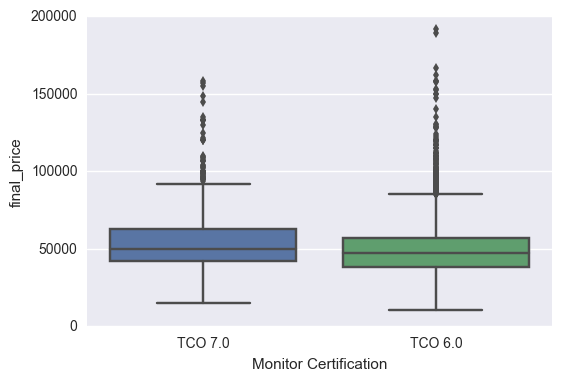

In [55]:
# After removing outliers
sns.boxplot(x= df['Monitor Certification'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

#### 3.3 Monitor Size

In [56]:
df['Monitor Size (INCHES)'] = df['Monitor Size (INCHES)'].astype(float)
df['Monitor Size (INCHES)'].value_counts()

19.500    5050
18.500    4456
21.500    1943
24.000      49
Name: Monitor Size (INCHES), dtype: int64

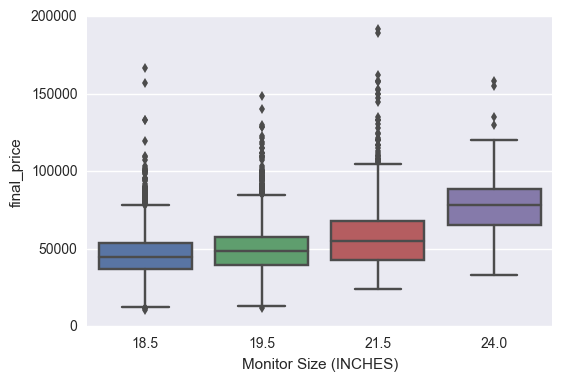

In [57]:
# After removing outliers
sns.boxplot(x= df['Monitor Size (INCHES)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

### 4. Graphic

#### 4.1 Graphics Type

In [58]:
df['Graphics Type'].value_counts()

Integrated            10783
Dedicated/Discrete      715
Name: Graphics Type, dtype: int64

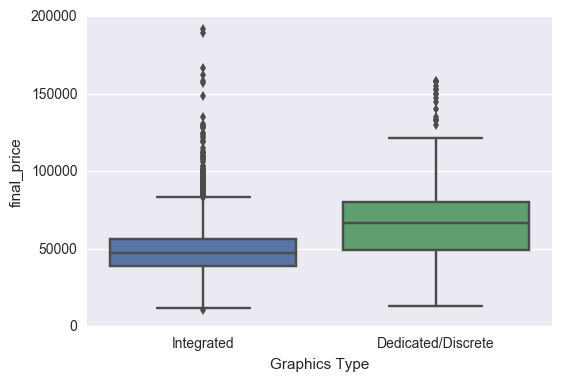

In [59]:
# After removing outliers
sns.boxplot(x= df['Graphics Type'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

#### 4.2 Graphics Memory

In [60]:
df['Graphic Memory'].value_counts()

2GB    914
1GB    697
4GB    309
Name: Graphic Memory, dtype: int64

In [61]:
# Changin to numbers
df['Graphic Memory'] = df['Graphic Memory'].apply(lambda x: None if pd.isnull(x) else x[0])

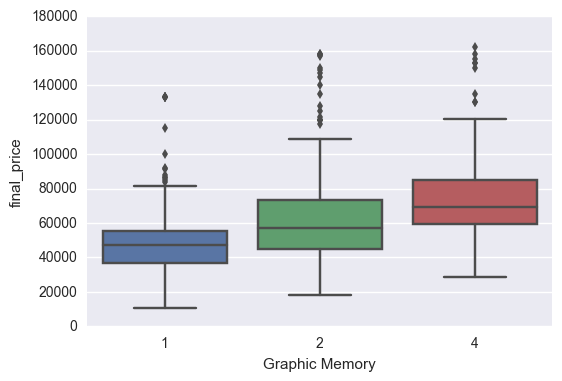

In [62]:
# After removing outliers
sns.boxplot(x= df['Graphic Memory'][(df.final_price<200000)],y= df['final_price'][(df.final_price<200000)])

In [63]:
# Fill Nulls 
mem = df['Graphic Memory'][(df['Graphics Type']!='Integrated') & (~pd.isnull(df['Graphic Memory']))].astype(float).mean()
print mem
def gra_mem(x):
    if (x['Graphics Type']=='Integrated') & (x['Graphic Memory']==None):
        return 0
    elif (x['Graphics Type']!='Integrated') & (x['Graphic Memory']==None):
        return mem
    else:
        return x['Graphic Memory']
df['Graphic Memory'] = df.apply(lambda x: gra_mem(x),axis=1).astype(float)


2.5679245283


#### Write a logic to fill 0s and nulls

### 5. Expansion Slots

#### 5.1 Expansion Slots (PCIe x 1) (Number)

In [64]:
df['Expansion Slots (PCIe x 1) (Number)'].isnull().any().sum()

0

In [65]:
df['Expansion Slots (PCIe x 1) (Number)']= df['Expansion Slots (PCIe x 1) (Number)'].astype(float)

In [66]:
df['Expansion Slots (PCIe x 1) (Number)'].value_counts()

1.000    7175
0.000    2121
2.000    1574
3.000     628
Name: Expansion Slots (PCIe x 1) (Number), dtype: int64

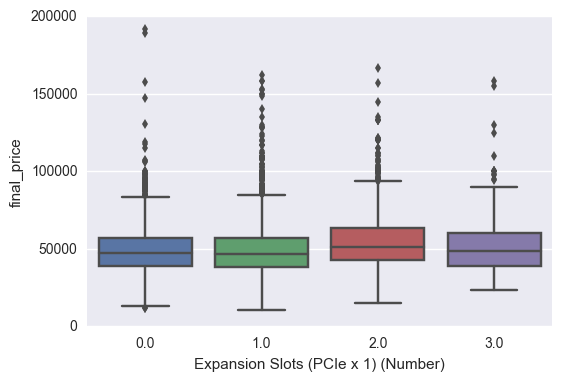

In [67]:
# After removing outliers
sns.boxplot(x= df['Expansion Slots (PCIe x 1) (Number)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

#### 5.2 Expansion Slots (PCIe x 16) (Number)

In [68]:
df['Expansion Slots (PCIe x 16) (Number)'].isnull().any().sum()

0

In [69]:
df['Expansion Slots (PCIe x 16) (Number)']= df['Expansion Slots (PCIe x 16) (Number)'].astype(float)

In [70]:
df['Expansion Slots (PCIe x 16) (Number)'].value_counts()

1.000    8868
2.000    1301
0.000    1143
3.000     107
4.000      79
Name: Expansion Slots (PCIe x 16) (Number), dtype: int64

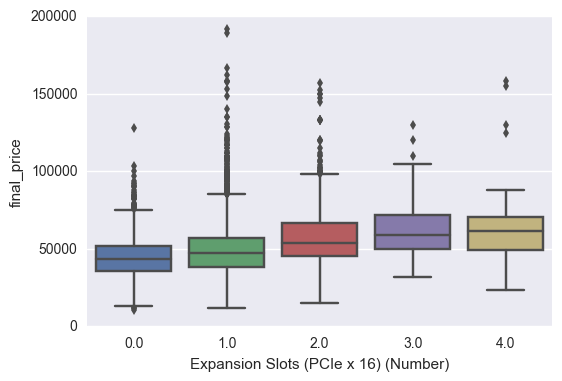

In [71]:
# After removing outliers
sns.boxplot(x= df['Expansion Slots (PCIe x 16) (Number)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

#### 5.3 Expansion Slots (PCIe x 4) (Number)

In [72]:
df['Expansion Slots (PCIe x 4) (Number)'].isnull().any().sum()

0

In [73]:
df['Expansion Slots (PCIe x 4) (Number)']= df['Expansion Slots (PCIe x 4) (Number)'].astype(float)

In [74]:
df['Expansion Slots (PCIe x 4) (Number)'].value_counts()

0.000    6592
1.000    4224
2.000     577
3.000      63
4.000      42
Name: Expansion Slots (PCIe x 4) (Number), dtype: int64

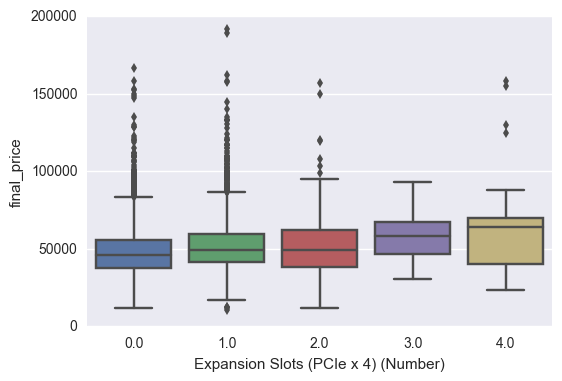

In [75]:
# After removing outliers
sns.boxplot(x= df['Expansion Slots (PCIe x 4) (Number)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

### 6. Ports and USB

#### 6.1 Display Port

In [76]:
df['Display Port'].isnull().sum()

0

In [77]:
df['Display Port'].value_counts()

TRUE     5773
FALSE    5725
Name: Display Port, dtype: int64

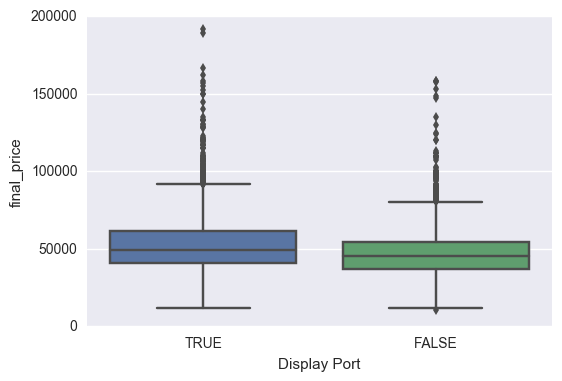

In [78]:
# After removing outliers
sns.boxplot(x= df['Display Port'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

#### 6.2 VGA

In [79]:
df.VGA.value_counts()

TRUE     10120
FALSE     1378
Name: VGA, dtype: int64

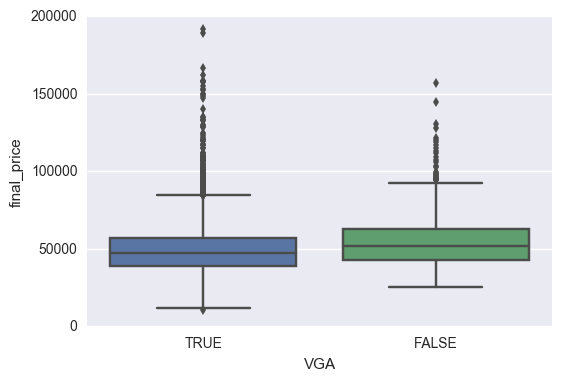

In [80]:
# After removing outliers
sns.boxplot(x= df['VGA'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

#### 6.3 Serial Port

In [81]:
df['Serial Port'].value_counts()

TRUE     5883
FALSE    5615
Name: Serial Port, dtype: int64

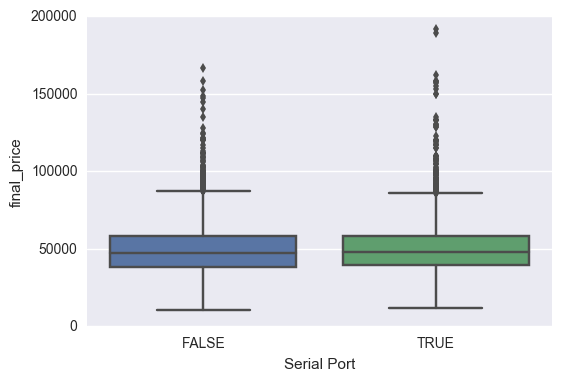

In [82]:
# After removing outliers
sns.boxplot(x= df['Serial Port'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

#### 6.4 Parallel Port

In [83]:
df['Parallel Port'].value_counts()

FALSE    9554
TRUE     1944
Name: Parallel Port, dtype: int64

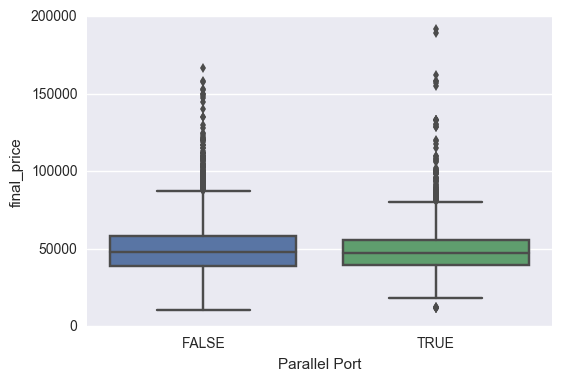

In [84]:
# After removing outliers
sns.boxplot(x= df['Parallel Port'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

#### 6.5 USB Port 3.0 (Number)

In [85]:
df['USB Port 3.0 (Number)'].isnull().sum()

0

In [86]:
df['USB Port 3.0 (Number)'].value_counts()

4    4799
2    3825
6    2197
3     321
1     256
0      84
5      16
Name: USB Port 3.0 (Number), dtype: int64

In [87]:
df['USB Port 3.0 (Number)'] = df['USB Port 3.0 (Number)'].astype(float)

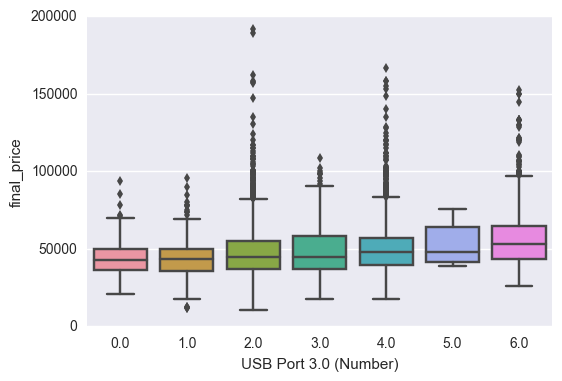

In [88]:
# After removing outliers
sns.boxplot(x= df['USB Port 3.0 (Number)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

#### 6.6 USB Port 2.0 (Number)

In [89]:
df['USB Port 2.0 (Number)'].isnull().sum()

0

In [90]:
df['USB Port 2.0 (Number)'] = df['USB Port 2.0 (Number)'].astype(float)

In [91]:
df['USB Port 2.0 (Number)'].value_counts()

4.000    6787
2.000    3203
6.000     966
3.000     226
0.000     170
1.000     138
5.000       8
Name: USB Port 2.0 (Number), dtype: int64

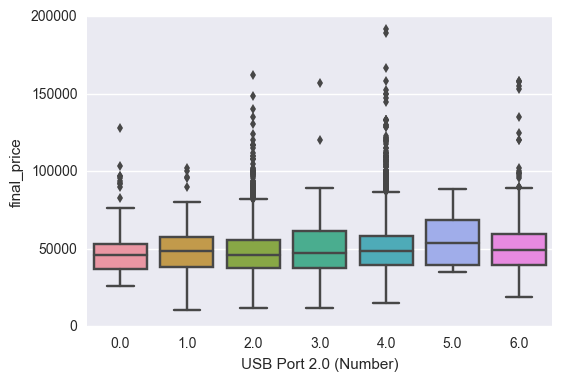

In [92]:
# After removing outliers
sns.boxplot(x= df['USB Port 2.0 (Number)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

#### 6.7 HDMI

In [93]:
df['HDMI'].isnull().sum()

0

In [94]:
df['HDMI'].value_counts()

TRUE     9878
FALSE    1620
Name: HDMI, dtype: int64

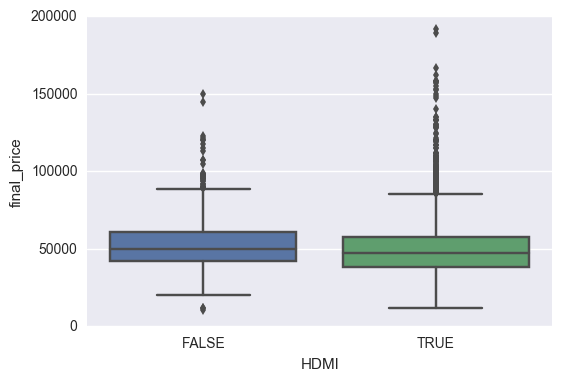

In [95]:
# After removing outliers
sns.boxplot(x= df['HDMI'][df.final_price<200000],y= df['final_price'][df.final_price<200000])

### 7.  Misc

#### 7.1 Chipset

In [96]:
df['Chipset'].value_counts()

Intel H110      6097
Intel B250      2356
Intel Q270      1712
Intel H270       583
Intel H170       241
Intel Q150       181
Intel Q170       106
AMD A Series      54
AMD B SERIES      46
Intel B170        40
Intel Q250        36
Intel Z170        18
Intel X299         9
Intel Z370         8
Intel Z270         8
Name: Chipset, dtype: int64

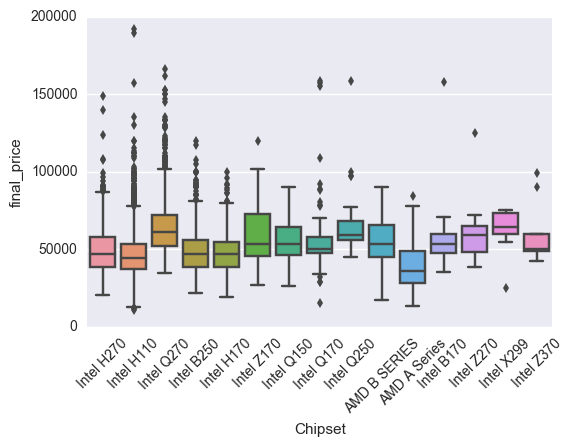

In [97]:
# After removing outliers
sns.boxplot(x= df['Chipset'][df.final_price<200000],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

#### 7.2 Minimum Power Efficiency(%)

In [98]:
df['Minimum Power Efficiency(%)'].value_counts()

85    11498
Name: Minimum Power Efficiency(%), dtype: int64

No Use of this column. Drop

In [99]:
df = df.drop('Minimum Power Efficiency(%)',axis=1)

#### 7.3 Power Supply (Watt)

In [100]:
df['Power Supply (Watt)'].value_counts()

180                                     4142
240                                     1880
200                                     1311
250                                      872
300                                      367
450                                      316
160                                      297
210                                      236
230                                      233
310                                      171
220                                      122
185                                      117
65                                        85
280                                       85
180W                                      72
350                                       56
500                                       46
85                                        37
120                                       36
90                                        32
180 W                                     30
180w                                      29
80        

In [101]:
df['Power Supply (Watt)'] = df['Power Supply (Watt)'].apply(lambda x: re.sub("\D", " ", str(x)).strip().split(' ')[0])
df['Power Supply (Watt)'] = df['Power Supply (Watt)'].apply(lambda x: x if len(x.strip())>0 else 0).astype(int)

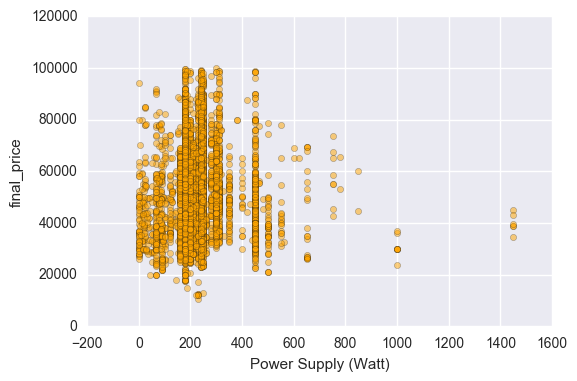

In [102]:
df[(df['Power Supply (Watt)']<1500)&(df['final_price']<100000)].plot(x='Power Supply (Watt)',y='final_price',alpha=.5,color='orange',kind='scatter')#,logy=True))

In [103]:
df['Power Supply (Watt)'] = df['Power Supply (Watt)'].apply(lambda x: 180 if (x<100|x>1000) else x )

#### 7.4 BEE / Energy Star for the given Model

In [104]:
df['BEE / Energy Star for the given Model'].isnull().sum()

0

In [105]:
df['BEE / Energy Star for the given Model'].value_counts()

TRUE     10273
FALSE     1225
Name: BEE / Energy Star for the given Model, dtype: int64

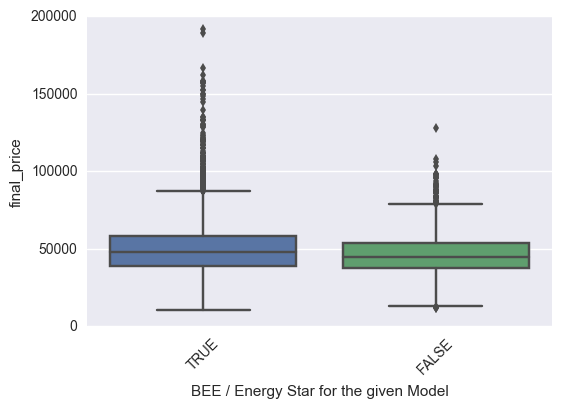

In [106]:
# After removing outliers
sns.boxplot(x= df['BEE / Energy Star for the given Model'][df.final_price<200000],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

#### 7.5 ROHS Compliance

In [107]:
df['ROHS Compliance'].isnull().sum()

0

In [108]:
df['ROHS Compliance'].value_counts()

Yes    11498
Name: ROHS Compliance, dtype: int64

In [109]:
# Remove
df = df.drop('ROHS Compliance',axis=1)

#### 7.6 Hard Disk (GB)

In [110]:
df['Hard Disk (GB)'].isnull().sum()

10

In [111]:
df['Hard Disk (GB)'].value_counts()

1000    9502
500     1717
2000     269
Name: Hard Disk (GB), dtype: int64

In [112]:
# Filling Null with 1000
df['Hard Disk (GB)'] = df['Hard Disk (GB)'].apply(lambda x: 1000 if pd.isnull(x) else x).astype(int)

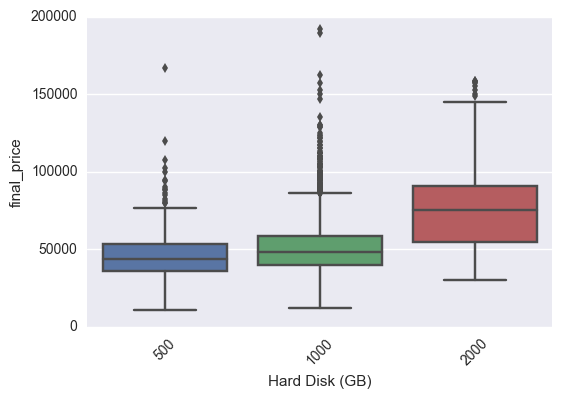

In [113]:
# After removing outliers
sns.boxplot(x= df['Hard Disk (GB)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

#### 7.7 Internal Speaker

In [114]:
df['Internal Speaker'].isnull().sum()

0

In [115]:
df['Internal Speaker'].value_counts()

FALSE    5976
TRUE     5522
Name: Internal Speaker, dtype: int64

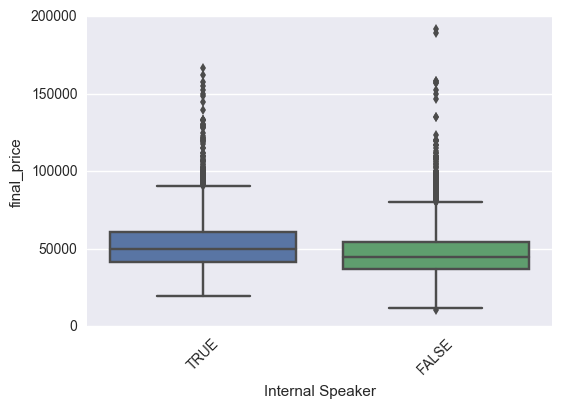

In [116]:
# After removing outliers
sns.boxplot(x= df['Internal Speaker'][df.final_price<200000],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

#### 7.8 Optical Drive

In [117]:
df['Optical Drive'].isnull().sum()

3455

In [118]:
df['Optical Drive'].value_counts()

DVD R/W    7839
DVD ROM     204
Name: Optical Drive, dtype: int64

In [119]:
# Remove
df = df.drop('Optical Drive',axis=1)

#### 7.9 On Site OEM Warranty (Year)

In [120]:
df['On Site OEM Warranty (Year)'].isnull().sum()

8

In [121]:
df['On Site OEM Warranty (Year)'].value_counts()

3    10813
5      677
Name: On Site OEM Warranty (Year), dtype: int64

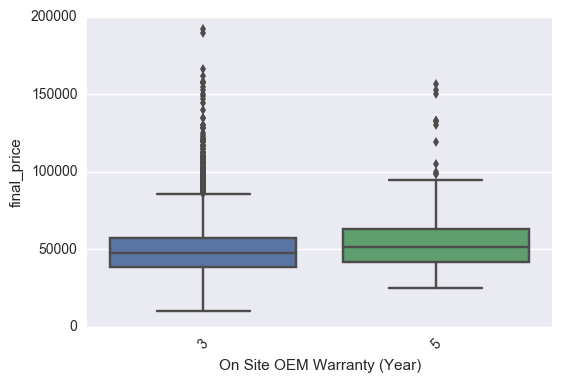

In [122]:
# After removing outliers
sns.boxplot(x= df['On Site OEM Warranty (Year)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

In [123]:
# Full null by 3
df['On Site OEM Warranty (Year)'] = df['On Site OEM Warranty (Year)'].apply(lambda x: 3 if pd.isnull(x) else x).astype(int)

#### 7.10 Keyboard

In [124]:
df['Keyboard'].isnull().sum()

0

In [125]:
df['Keyboard'].value_counts()

Standard     11305
Bilingual      193
Name: Keyboard, dtype: int64

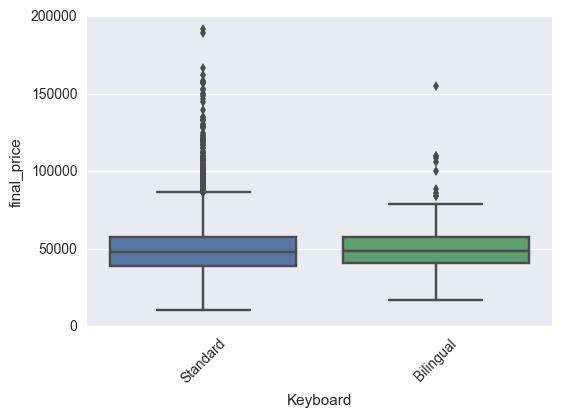

In [126]:
# After removing outliers
sns.boxplot(x= df['Keyboard'][df.final_price<200000],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

#### 7.11 Mouse

In [127]:
df['Mouse'].isnull().sum()

0

In [128]:
df['Mouse'].value_counts()

Optical    11498
Name: Mouse, dtype: int64

In [129]:
# Remove
df=df.drop('Mouse',axis=1)

#### 7.12 Operating System (Pre-Loaded)

In [130]:
df['Operating System (Pre-Loaded)'].isnull().sum()

0

In [131]:
# Picking the first OS
df['Operating System (Pre-Loaded)'] = df['Operating System (Pre-Loaded)'].apply(lambda x: x.split(',')[0])
df['Operating System (Pre-Loaded)'] = df['Operating System (Pre-Loaded)'].apply(lambda x: 'Windows 10 Professional' if x=='Windows 10 Professional under Microsoft Shape the Future Program' else x)

In [132]:
df['Operating System (Pre-Loaded)'].value_counts()

Windows 10 Professional    7030
Windows 10 Home            1760
Linux                      1483
DOS                        1225
Name: Operating System (Pre-Loaded), dtype: int64

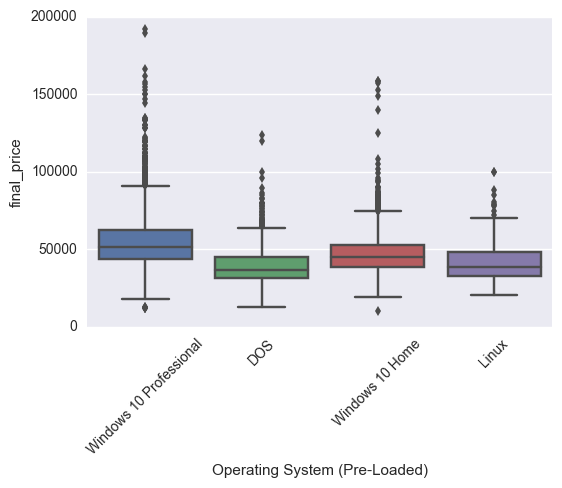

In [133]:
# After removing outliers
sns.boxplot(x= df['Operating System (Pre-Loaded)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

#### 7.13 Wireless

In [134]:
df['Wireless'].isnull().sum()

8063

In [135]:
#Remove
df = df.drop('Wireless',axis=1)

#### 7.14 Network Connectivity

In [136]:
df['Network Connectivity'].isnull().sum()

0

In [137]:
df['Network Connectivity'].value_counts()

10/100/1000 on board Integrated Gigabit Port    11498
Name: Network Connectivity, dtype: int64

In [138]:
# Remove
df = df.drop('Network Connectivity',axis=1)

#### 7.15 Cabinet Volume (Litres)

In [139]:
df['Cabinet Volume (Litres)'].isnull().sum()

0

In [140]:
df['Cabinet Volume (Litres)'] = df['Cabinet Volume (Litres)'].astype(float)

In [141]:
df['Cabinet Volume (Litres)'].describe()

count   11498.000
mean       15.827
std         7.108
min         1.000
25%        10.000
50%        15.000
75%        20.000
max        30.000
Name: Cabinet Volume (Litres), dtype: float64

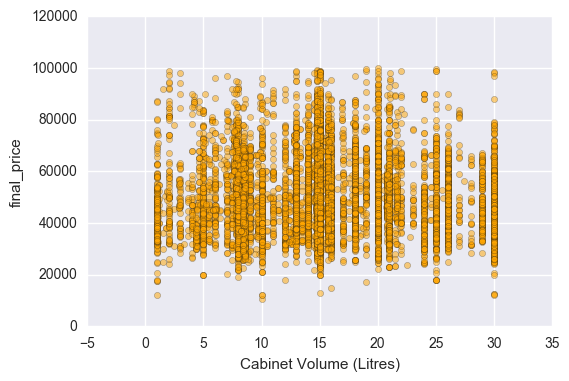

In [142]:
df[(df['final_price']<100000)].plot(x='Cabinet Volume (Litres)',y='final_price',alpha=.5,color='orange',kind='scatter')#,logy=True))

#### 7.16 Internal Bays

In [143]:
df['Internal Bays'].isnull().sum()

0

In [144]:
df['Internal Bays'] = df['Internal Bays'].astype(float)

In [145]:
df['Internal Bays'].value_counts()

1.000    5528
2.000    4861
3.000     944
4.000     165
Name: Internal Bays, dtype: int64

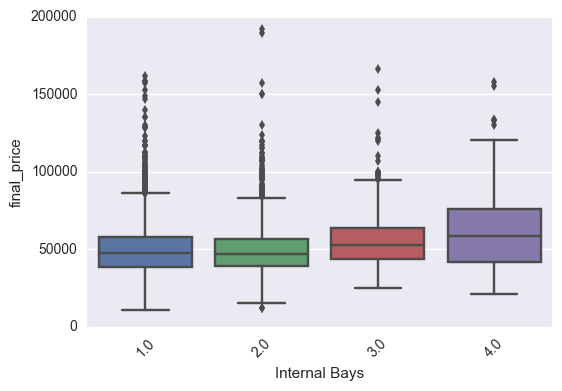

In [146]:
# After removing outliers
sns.boxplot(x= df['Internal Bays'][df.final_price<200000],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

#### 7.17 External Bays (Number)

In [147]:
df['External Bays (Number)'].isnull().sum()

0

In [148]:
df['External Bays (Number)'] = df['External Bays (Number)'].astype(float)

In [149]:
df['External Bays (Number)'].value_counts()

1.000    6982
2.000    2603
0.000    1670
3.000     187
4.000      56
Name: External Bays (Number), dtype: int64

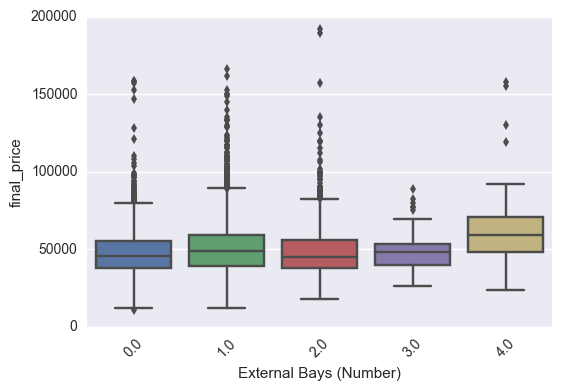

In [150]:
# After removing outliers
sns.boxplot(x= df['External Bays (Number)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

#### 7.18 DIMM Slots (Number)

In [151]:
df['DIMM Slots (Number)'].isnull().sum()

0

In [152]:
df['DIMM Slots (Number)'] = df['DIMM Slots (Number)'].astype(float)

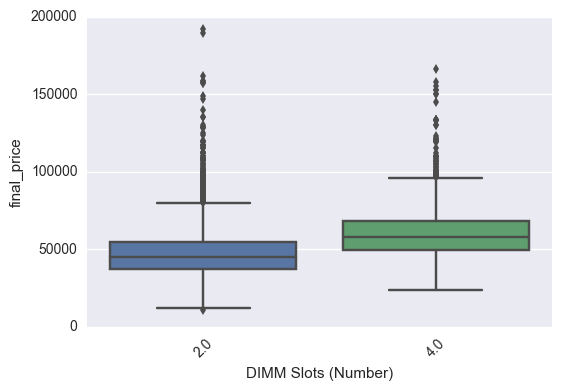

In [153]:
# After removing outliers
sns.boxplot(x= df['DIMM Slots (Number)'][df.final_price<200000],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

#### 7.19 Cabinet

In [154]:
df['Cabinet'].isnull().sum()

0

In [155]:
df['Cabinet'].value_counts()

Tower                      8179
Small Form Factor          3188
Ultra Small Form Factor     131
Name: Cabinet, dtype: int64

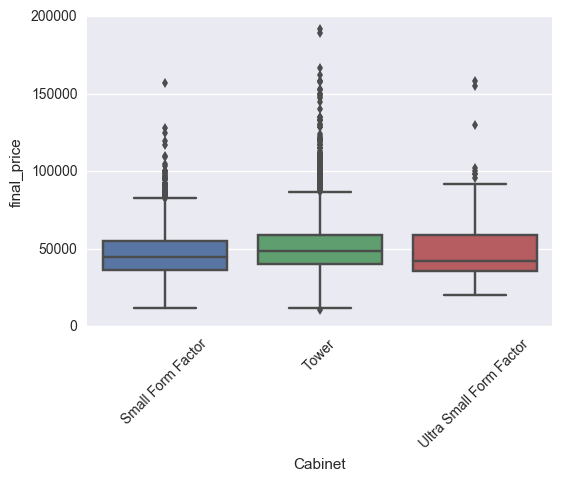

In [156]:
# After removing outliers
sns.boxplot(x= df['Cabinet'][df.final_price<200000],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

#### 7.20 Brand

In [157]:
df.Brand.isnull().sum()

24

In [158]:
#lower
df['Brand'] = df['Brand'].apply(lambda x: x.lower() if type(x)==str else x)

In [159]:
# Map for brands
brand_map  ={'hewlett packard':'hp','dell 3268 sff':'dell','dell optiplex 3050':'dell','acer india ltd':'acer'}
# Replace
df['Brand'] = df['Brand'].apply(lambda x: x if x not in brand_map.keys() else brand_map[x])

In [160]:
major_brands = df.Brand.value_counts().index[:5]
df['Brand'] = df.Brand.apply(lambda x: x if x in major_brands else 'other')

In [161]:
df['Brand'].value_counts()

hp        3592
dell      3056
acer      2734
lenovo    1783
other      259
acxxel      74
Name: Brand, dtype: int64

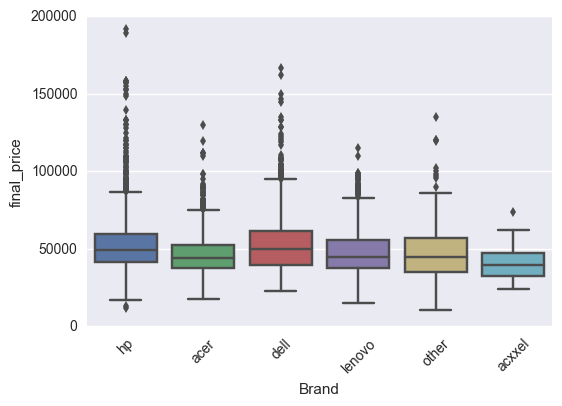

In [162]:
# After removing outliers
sns.boxplot(x= df['Brand'][df.final_price<200000],y= df['final_price'][df.final_price<200000])
_=plt.xticks(rotation=45)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11498 entries, 1 to 11504
Data columns (total 47 columns):
RAM Expandability upto (GB)              11498 non-null float64
RAM Speed (MHz)                          11498 non-null float64
RAM Size (GB)                            11498 non-null int32
Expansion Slots (PCIe x 1) (Number)      11498 non-null float64
Expansion Slots (PCIe x 16) (Number)     11498 non-null float64
Expansion Slots (PCIe x 4) (Number)      11498 non-null float64
Chipset                                  11495 non-null object
Power Supply (Watt)                      11498 non-null int64
Monitor Resolution (PIXELS)              11498 non-null int64
Monitor Certification                    11498 non-null object
Monitor Size (INCHES)                    11498 non-null float64
Display Port                             11498 non-null object
VGA                                      11498 non-null object
Serial Port                              11498 non-null object
Parall

In [164]:
#df = df.set_index('VariantID')

### Final Price

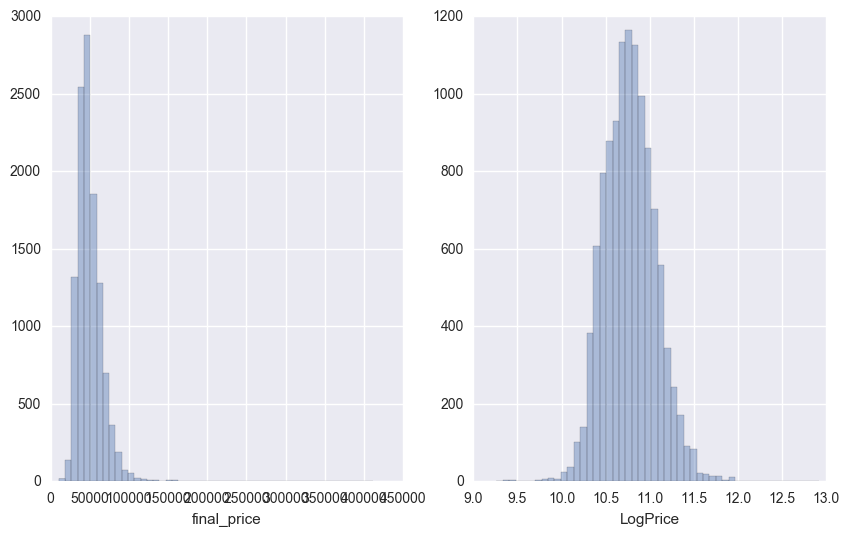

In [165]:
# Log Transform
df['LogPrice'] = np.log(df['final_price']+1)
f,axs = plt.subplots(1,2,figsize = (10,6))
sns.distplot(df['final_price'],kde = False,color= 'b',ax=axs[0])
sns.distplot(df['LogPrice'],kde = False,color= 'b',ax=axs[1])  ## Will use log of sales as it makes the distribution normal

In [166]:
df['final_price'].describe()

count    11498.000
mean     50248.882
std      17367.096
min      10500.000
25%      38990.000
50%      47800.000
75%      58000.000
max     411260.000
Name: final_price, dtype: float64

In [167]:
df.columns

Index([u'RAM Expandability upto (GB)', u'RAM Speed (MHz)', u'RAM Size (GB)',
       u'Expansion Slots (PCIe x 1) (Number)',
       u'Expansion Slots (PCIe x 16) (Number)',
       u'Expansion Slots (PCIe x 4) (Number)', u'Chipset',
       u'Power Supply (Watt)', u'Monitor Resolution (PIXELS)',
       u'Monitor Certification', u'Monitor Size (INCHES)', u'Display Port',
       u'VGA', u'Serial Port', u'Parallel Port', u'USB Port 3.0 (Number)',
       u'HDMI', u'USB Port 2.0 (Number)', u'Graphic Memory', u'Graphics Type',
       u'BEE / Energy Star for the given Model', u'Hard Disk (GB)',
       u'Internal Speaker', u'On Site OEM Warranty (Year)', u'Keyboard',
       u'Processor Make', u'Processor Generation', u'Processor',
       u'Operating System (Pre-Loaded)', u'Cabinet Volume (Litres)',
       u'Internal Bays', u'External Bays (Number)', u'DIMM Slots (Number)',
       u'Cabinet', u'final_price', u'VariantID', u'Title', u'Brand', u'Model',
       u'Seller Name', u'P_Br', u'Processor_Co

In [168]:
# Selecting Features
feat = [u'RAM Expandability upto (GB)', u'RAM Speed (MHz)', u'RAM Size (GB)',
       u'Expansion Slots (PCIe x 1) (Number)',
       u'Expansion Slots (PCIe x 16) (Number)',
       u'Expansion Slots (PCIe x 4) (Number)', u'Chipset',
       u'Power Supply (Watt)', u'Monitor Resolution (PIXELS)',
       u'Monitor Certification', u'Monitor Size (INCHES)', u'Display Port',
       u'VGA', u'Serial Port', u'Parallel Port', u'USB Port 3.0 (Number)',
       u'HDMI', u'USB Port 2.0 (Number)', u'Graphic Memory', u'Graphics Type',
       u'BEE / Energy Star for the given Model', u'Hard Disk (GB)',
       u'Internal Speaker', u'On Site OEM Warranty (Year)', u'Keyboard',
       u'Processor Make', u'Processor Generation',
       u'Operating System (Pre-Loaded)', u'Cabinet Volume (Litres)',
       u'Internal Bays', u'External Bays (Number)', u'DIMM Slots (Number)',
       u'Cabinet',  u'Brand', u'Processor_Core_Type_Num',
       u'Processor_Speed', u'Processor_Cache',
       u'Processor_Cores',u'LogPrice',u'final_price']

In [169]:
df[feat].select_dtypes(include = ['object']).columns

Index([u'Chipset', u'Monitor Certification', u'Display Port', u'VGA',
       u'Serial Port', u'Parallel Port', u'HDMI', u'Graphics Type',
       u'BEE / Energy Star for the given Model', u'Internal Speaker',
       u'Keyboard', u'Processor Make', u'Operating System (Pre-Loaded)',
       u'Cabinet', u'Brand'],
      dtype='object')

In [170]:
data = pd.get_dummies(df[feat],drop_first=True)

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11498 entries, 1 to 11504
Data columns (total 60 columns):
RAM Expandability upto (GB)                              11498 non-null float64
RAM Speed (MHz)                                          11498 non-null float64
RAM Size (GB)                                            11498 non-null int32
Expansion Slots (PCIe x 1) (Number)                      11498 non-null float64
Expansion Slots (PCIe x 16) (Number)                     11498 non-null float64
Expansion Slots (PCIe x 4) (Number)                      11498 non-null float64
Power Supply (Watt)                                      11498 non-null int64
Monitor Resolution (PIXELS)                              11498 non-null int64
Monitor Size (INCHES)                                    11498 non-null float64
USB Port 3.0 (Number)                                    11498 non-null float64
USB Port 2.0 (Number)                                    11498 non-null float64
Graphic Memory   

## Models

In [172]:
feat = data.drop(['final_price','LogPrice'],axis=1).columns

In [173]:
target = data['LogPrice']

### 1. Multi Reg

In [174]:
reg1 = linear_model.LinearRegression()

In [175]:
def fitr(reg,data,feature,target):
    data_feature = data[feature]
    data_target = target
    reg.fit(data_feature,data_target)
    pval = feature_selection.f_regression(data_feature, data_target, center=True)
    coef = reg.coef_
    return coef,pval

In [176]:
coef_model1,pval1 = fitr(reg1,data,feat,target)

In [177]:
print cross_val_score(reg1,data[feat],target,cv=10,scoring = 'mean_squared_error').mean()

C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

-0.0255677347935


C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


### 2.  Ridge Reg

In [178]:
def cv_score(model):
    return cross_val_score(model,data[feat],target,cv=10,scoring = 'mean_squared_error').mean()

In [179]:
alpha = [1, 2,2.5,3,3.5,3.8,4,4.5]
mse = []
for i in alpha:
    mse.append(-cv_score(Ridge(alpha=i)))

C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

In [180]:
series = pd.Series(mse,alpha)

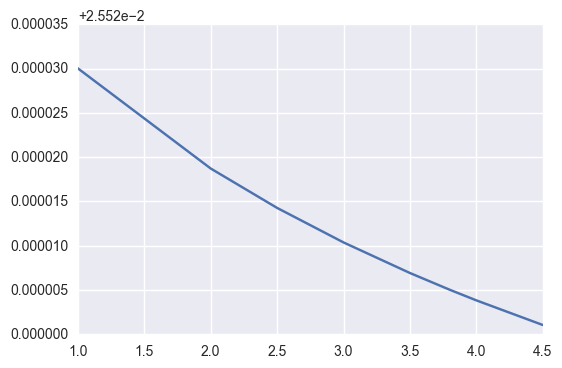

In [181]:
series.plot()

In [182]:
series.min()

0.025521044941816617

### 3. Lasso

In [183]:
#data = pd.read_csv('data.csv')

In [184]:
alpha_lasso = [0.00015,0.0002,0.00025,0.0003,0.00035,0.0004]
lasso_mse = []
for i in alpha_lasso:
    lasso_mse.append(-cv_score(Lasso(i)))
lasso_ser = pd.Series(lasso_mse,alpha_lasso)

C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

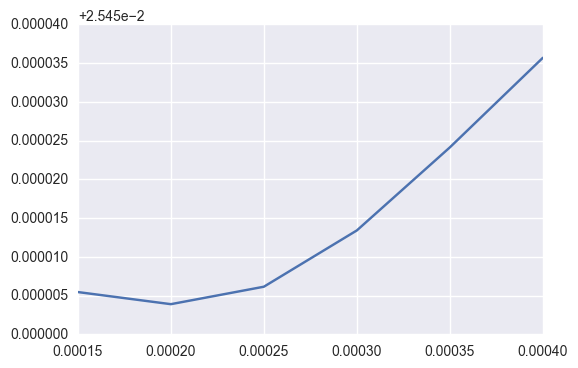

In [185]:
lasso_ser.plot()

#### Minimum mse for alpha = 0.0002

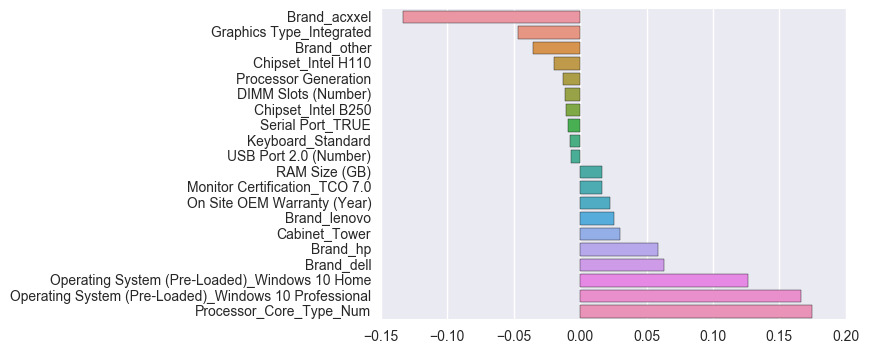

In [186]:
reg3 = Lasso(alpha = .0002)
reg3.fit(data[feat],data['LogPrice'])
a = pd.Series(abs(reg3.coef_),index = list(data[feat].columns.values))
lasso_feat = a[a>0].index
## Features with coeff not equal to 0
lasso_feat = list(lasso_feat) 

# Most important features
coef = pd.Series((reg3.coef_),index = list(data[feat].columns.values))
coef_lasso = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
sns.barplot(x=coef_lasso, y=coef_lasso.index)

### 4. Random Forest Regression

In [207]:
#data = data.reset_index().drop('VariantID',axis=1)

In [187]:
kf = KFold(n_splits=5,shuffle=True,random_state=1)

In [188]:
def RandomForest(tr,te,f):
    RFreg = RF(n_estimators=1000,min_samples_split =3,n_jobs =-1,max_features =0.2)
    RFreg.fit(tr[f],tr['LogPrice'])
    tr['pred'] = np.exp(RFreg.predict(tr[f]))
    te['pred'] = np.exp(RFreg.predict(te[f]))
    #te.to_csv('te.csv',index=False)
    return RFreg,median_absolute_error(tr['final_price'],tr['pred']), mean_absolute_error(tr['final_price'],tr['pred']),median_absolute_error(te['final_price'],te['pred']), mean_absolute_error(te['final_price'],te['pred'])
    

In [189]:
def DecisionTree(tr,te,f):
    DTree = DT(max_depth=5,min_samples_split =10)#,max_features =0.2)
    DTree.fit(tr[f],tr['final_price'])
    tr['pred'] = DTree.predict(tr[f])
    te['pred'] = (DTree.predict(te[f]))
    export_graphviz(DTree,feature_names=lasso_feat)
    
    check_call(['dot','-Tpng','tree.dot','-o','tree.png'])
    return DTree,median_absolute_error(tr['final_price'],tr['pred']), mean_absolute_error(tr['final_price'],tr['pred']),median_absolute_error(te['final_price'],te['pred']), mean_absolute_error(te['final_price'],te['pred'])
    

In [193]:
lasso_feat

['Serial Port_TRUE',
 'Monitor Certification_TCO 7.0',
 'Operating System (Pre-Loaded)_Linux',
 'Brand_lenovo',
 'Chipset_Intel B250',
 'Brand_dell',
 'Graphics Type_Integrated',
 'Brand_acxxel',
 'Cabinet Volume (Litres)',
 'DIMM Slots (Number)',
 'Chipset_Intel Q170',
 'Expansion Slots (PCIe x 1) (Number)',
 'RAM Expandability upto (GB)',
 'Brand_other',
 'BEE / Energy Star for the given Model_TRUE',
 'Chipset_Intel H110',
 'USB Port 3.0 (Number)',
 'Expansion Slots (PCIe x 16) (Number)',
 'On Site OEM Warranty (Year)',
 'Display Port_TRUE',
 'Keyboard_Standard',
 'Processor Generation',
 'Monitor Resolution (PIXELS)',
 'Graphic Memory',
 'Monitor Size (INCHES)',
 'Chipset_AMD B SERIES',
 'Chipset_Intel Q270',
 'Hard Disk (GB)',
 'Internal Bays',
 'USB Port 2.0 (Number)',
 'Brand_hp',
 'HDMI_TRUE',
 'VGA_TRUE',
 'Internal Speaker_TRUE',
 'Cabinet_Tower',
 'RAM Speed (MHz)',
 'Operating System (Pre-Loaded)_Windows 10 Home',
 'Power Supply (Watt)',
 'Operating System (Pre-Loaded)_Windo

In [194]:
median_absolute_error_tr=[]
mean_absolute_error_tr = []
median_absolute_error_te=[]
mean_absolute_error_te = []
R=1
for tr_index,te_index in kf.split(data):
    print("TRAIN:", tr_index, "TEST:", te_index)
    tr,te = data.iloc[tr_index], data.iloc[te_index]
    if R==1:
        print('Using RF')
        Rfreg,m1,m2,m3,m4 = RandomForest(tr,te,lasso_feat)
    
        median_absolute_error_tr.append(m1)
        mean_absolute_error_tr.append(m2)
        median_absolute_error_te.append(m3)
        mean_absolute_error_te.append(m4)
    if R==0:
        print('Using DT')
        Dreg,m1,m2,m3,m4 = DecisionTree(tr,te,lasso_feat)
    
        median_absolute_error_tr.append(m1)
        mean_absolute_error_tr.append(m2)
        median_absolute_error_te.append(m3)
        mean_absolute_error_te.append(m4)
        
print ('median_absolute_error_tr:',np.mean(median_absolute_error_tr),'\nmean_absolute_error_tr:',np.mean(mean_absolute_error_tr))    
print ('median_absolute_error_te:',np.mean(median_absolute_error_te),'\nmean_absolute_error_te:',np.mean(mean_absolute_error_te))    

('TRAIN:', array([    0,     1,     2, ..., 11494, 11495, 11497]), 'TEST:', array([    4,     6,     7, ..., 11488, 11490, 11496]))
Using RF
('TRAIN:', array([    0,     1,     2, ..., 11495, 11496, 11497]), 'TEST:', array([   10,    16,    21, ..., 11472, 11491, 11494]))
Using RF
('TRAIN:', array([    0,     1,     2, ..., 11494, 11496, 11497]), 'TEST:', array([    3,     5,    11, ..., 11480, 11493, 11495]))
Using RF
('TRAIN:', array([    0,     2,     3, ..., 11494, 11495, 11496]), 'TEST:', array([    1,     8,     9, ..., 11487, 11489, 11497]))
Using RF
('TRAIN:', array([    1,     3,     4, ..., 11495, 11496, 11497]), 'TEST:', array([    0,     2,    15, ..., 11479, 11482, 11492]))
Using RF
('median_absolute_error_tr:', 2739.4039860994499, '\nmean_absolute_error_tr:', 4221.5919740575719)
('median_absolute_error_te:', 4888.7421041798025, '\nmean_absolute_error_te:', 6938.2886117281114)


In [191]:
data.head()

,RAM Expandability upto (GB),RAM Speed (MHz),RAM Size (GB),Expansion Slots (PCIe x 1) (Number),Expansion Slots (PCIe x 16) (Number),Expansion Slots (PCIe x 4) (Number),Power Supply (Watt),Monitor Resolution (PIXELS),Monitor Size (INCHES),USB Port 3.0 (Number),...,Operating System (Pre-Loaded)_Linux,Operating System (Pre-Loaded)_Windows 10 Home,Operating System (Pre-Loaded)_Windows 10 Professional,Cabinet_Tower,Cabinet_Ultra Small Form Factor,Brand_acxxel,Brand_dell,Brand_hp,Brand_lenovo,Brand_other
1,32.000,2400.000,8,0.000,1.000,1.000,180,1296000,19.500,4.000,...,0,0,1,0,0,0,0,1,0,0
2,32.000,2400.000,8,0.000,1.000,1.000,180,1296000,19.500,4.000,...,0,0,1,0,0,0,0,1,0,0
3,16.000,2133.000,4,1.000,0.000,0.000,220,1049088,19.500,2.000,...,0,0,1,1,0,0,0,0,0,0
4,16.000,2133.000,4,1.000,0.000,0.000,220,1049088,19.500,2.000,...,0,0,1,1,0,0,0,0,0,0
5,32.000,2400.000,4,1.000,1.000,1.000,200,1049088,18.500,2.000,...,0,0,0,1,0,0,0,0,0,0


In [192]:
# On whole dataset
RF_final = RF(n_estimators=1500,min_samples_split =3,n_jobs =-1,max_features =0.2)
RF_final.fit(data[lasso_feat],data['LogPrice'])
data['pred'] = np.exp(RF_final.predict(data[lasso_feat]))

In [193]:
print('Median Abs Error:', median_absolute_error(data['final_price'],data['pred']))

('Median Abs Error:', 1250.9997291765903)


In [194]:
imp_df = pd.DataFrame({'Col':lasso_feat,'imp':Rfreg.feature_importances_})

In [195]:
imp_df.sort_values(by='imp',ascending=False)

,Col,imp
18,Processor_Core_Type_Num,0.185
20,Processor_Cache,0.176
21,Processor_Cores,0.106
19,Processor_Speed,0.068
2,RAM Size (GB),0.058
41,Operating System (Pre-Loaded)_Windows 10 Profe...,0.041
15,Cabinet Volume (Litres),0.033
6,Power Supply (Watt),0.022
11,Graphic Memory,0.017
0,RAM Expandability upto (GB),0.017


In [196]:
imp_df.to_csv('Importance.csv')

In [197]:
final_df = pd.concat([final,data[['pred']]],axis=1)

In [198]:
final_df[['final_price','pred']].head()

,final_price,pred
1,51000.000,52897.832
2,49450.000,52897.832
3,40000.000,43560.656
4,48000.000,43560.656
5,30900.000,32105.355


In [199]:
len(final_df)

11498

In [200]:
final_df.to_csv('export.csv',index=False)